In [1]:
import json

In [3]:
with open("./train.json", "r", encoding='utf-8') as reader:
    input_data = json.load(reader)["data"]
    reader.close()

In [4]:
print(len(input_data)) # 138 articles

138


In [16]:
def length_data_per_tokenizer(file_path, tokenizer):
    length_contexts = []
    length_qas = []
    length_ans = []
    length_query_context = []
    num_contexts = 0
    num_qas = 0
    num_ans = 0
    for entry in input_data:
        for paragraph in entry["paragraphs"]:
            num_contexts += 1
            paragraph_text = paragraph["context"]
            len_context = len(tokenizer.tokenize(paragraph_text))
            length_contexts.append(len_context)
            for qa in paragraph["qas"]:
                is_impossible = qa["is_impossible"]
                num_qas += 1
                num_ans += 1
                question = qa["question"]
                len_query = len(tokenizer.tokenize(question))
                length_qas.append(len_query)
                length_query_context.append(len_context + len_query + 3)
                if not is_impossible:
                    answers = qa["answers"][0]
                    answers_text = answers["text"]
                    length_ans.append(len(tokenizer.tokenize(answers_text)))
                else:
                    length_ans.append(0)
    assert num_ans == num_qas
    print("number questions: ", num_qas)
    return length_contexts, length_qas, length_ans, length_query_context

In [17]:
from transformers import BertTokenizer, XLMRobertaTokenizer
tokenizer_mbert = BertTokenizer.from_pretrained("bert-base-multilingual-cased")
tokenizer_xlmr = XLMRobertaTokenizer.from_pretrained("xlm-roberta-base")

In [18]:
data_path = "./train.json"
mbert_len = length_data_per_tokenizer(data_path, tokenizer_mbert)
xlmr_len = length_data_per_tokenizer(data_path, tokenizer_xlmr)

number questions:  28457
number questions:  28457


In [19]:
import matplotlib.pyplot as plt

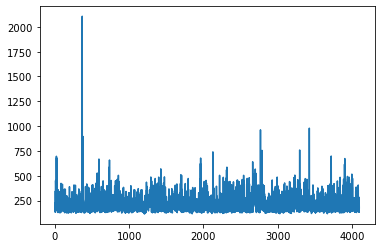

In [23]:
plt.plot(mbert_len[0])

In [21]:
print(len(mbert_len[0]))

4101


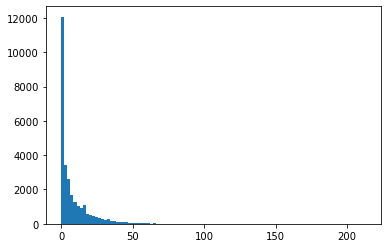

In [47]:
plt.hist(mbert_len[2], bins=100)
plt.show()

In [57]:
count_512 = 0
for l in mbert_len[3]:
    if l <= 410:
        count_512 += 1
percent = count_512/len(mbert_len[3])*100
print(percent)

95.03812770144428


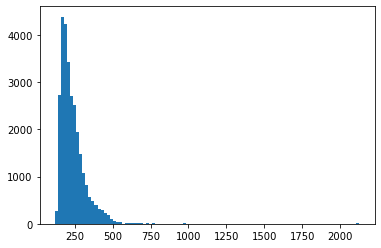

In [50]:
plt.hist(xlmr_len[3], bins=100)
plt.show()

In [51]:
count_512 = 0
for l in mbert_len[3]:
    if l <= 512:
        count_512 += 1
percent = count_512/len(mbert_len[3])*100
print(percent)

98.95983413571354
